In [1]:
import os
import matplotlib.pyplot as plt
import math
import cv2
import numpy as np

In [2]:
data_path = '/var/tmp/zapp_an-a/Desktop/gamma_sources_identification/CNN_project/gray_stretch_dataset'
# ASSUMING WE ARE DOING BINARY CLASSIFICATION
def load_data():
    # let's put directly images inside these arrays and not only image paths
    x_train = []
    y_train = []
    x_test = []
    y_test = []

    train_bkg_count = 0
    train_src_count = 0

    for img_name in os.listdir(data_path):
        img_full_path = data_path + '/' + img_name
        image = cv2.imread(img_full_path)
        image = cv2.pyrDown(image)
        image = cv2.pyrDown(image)
        if img_name[0] == 'B': #background image
            if train_bkg_count < 800: # append in training set
                x_train.append(image)
                y_train.append(0)
                train_bkg_count += 1
            else: # append in test set
                x_test.append(image)
                y_test.append(0)
        else: #source image
            if train_src_count < 800:
                x_train.append(image)
                y_train.append(1)
                train_src_count += 1
            else: # append in test set
                x_test.append(image)
                y_test.append(1)

    # at the end of the for loop we should have the split dataset
    x_train = np.array(x_train)
    y_train = np.array(y_train)
    x_test = np.array(x_test)
    y_test = np.array(y_test)
    return (x_train, y_train), (x_test, y_test)

In [3]:
(x_train, y_train), (x_test, y_test) = load_data()

In [4]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1600, 150, 150, 3)
(1600,)
(400, 150, 150, 3)
(400,)


In [5]:
# ok so we have the whole loaded dataset. Each image is of course made of 3 channels. Let's see how a
# possible CNN behave

In [6]:
# Normalization
x_train = x_train / 255
x_test = x_test / 255

In [7]:
# BUILING THE CONVOLUTIONAL NEURAL NETWORKS

In [8]:
import tensorflow as tf
from tensorflow import keras

2023-08-31 08:18:41.849069: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-31 08:18:41.858526: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-31 08:18:41.960443: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-31 08:18:41.961156: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-31 08:18:42.441812: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

In [9]:
num_of_classes = 2

model = keras.Sequential()
#before we included all the layers in the "constructor of Sequential", but we can also do model.add
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3))) # the input shape only in the first layer
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5)) #just to fight overfitting, we drop some (neurons?)

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation='sigmoid')) #sigmoid because we're doing binary classification.

In [10]:
# compile

model.compile(optimizer = 'adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [14]:
# training the neural network
history = model.fit(x_train, y_train, validation_split=0.1, epochs=10) #+20 = 30
#few epochs for avoiding overtraining

Epoch 1/10
45/45 [==============================] - 7s 156ms/step - loss: 0.2313 - acc: 0.8840 - val_loss: 0.4283 - val_acc: 0.8562
Epoch 2/10
45/45 [==============================] - 7s 144ms/step - loss: 0.2175 - acc: 0.8944 - val_loss: 0.6263 - val_acc: 0.8000
Epoch 3/10
45/45 [==============================] - 7s 152ms/step - loss: 0.2055 - acc: 0.9042 - val_loss: 0.4114 - val_acc: 0.8500
Epoch 4/10
45/45 [==============================] - 7s 146ms/step - loss: 0.2045 - acc: 0.8979 - val_loss: 0.7918 - val_acc: 0.7750
Epoch 5/10
45/45 [==============================] - 6s 144ms/step - loss: 0.2035 - acc: 0.8951 - val_loss: 0.5381 - val_acc: 0.8125
Epoch 6/10
45/45 [==============================] - 7s 147ms/step - loss: 0.2024 - acc: 0.8910 - val_loss: 0.8329 - val_acc: 0.7625
Epoch 7/10
45/45 [==============================] - 7s 158ms/step - loss: 0.1873 - acc: 0.9076 - val_loss: 0.8030 - val_acc: 0.7563
Epoch 8/10
45/45 [==============================] - 6s 134ms/step - loss: 0.

In [15]:
loss, accuracy = model.evaluate(x_test, y_test)
print('Test Accuracy =', accuracy)

13/13 [==============================] - 0s 29ms/step - loss: 0.4109 - acc: 0.8475
Test Accuracy = 0.8475000262260437


## Now let's try to optimize the model and let's look at the results

In [23]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [24]:
model.compile(optimizer = 'adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [26]:
#from keras.utils import to_categorical
#y_train_one_hot = to_categorical(y_train, num_classes=2)
history = model.fit(x_train, y_train, validation_split=0.1, epochs=1) #=21 

45/45 [==============================] - 11s 242ms/step - loss: 0.1599 - acc: 0.9333 - val_loss: 0.2106 - val_acc: 0.8875


In [27]:
loss, accuracy = model.evaluate(x_test, y_test)
print('Test Accuracy =', accuracy)

13/13 [==============================] - 1s 64ms/step - loss: 0.5172 - acc: 0.8800
Test Accuracy = 0.8799999952316284


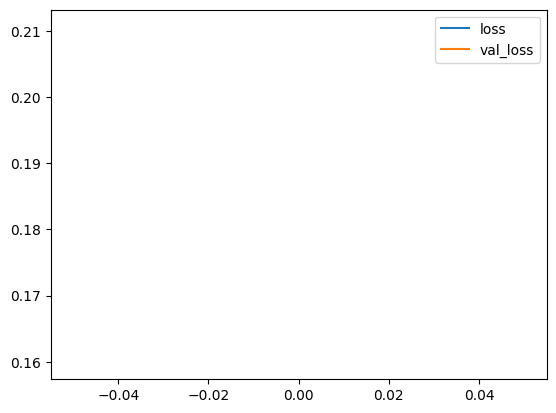

In [30]:
# Plot loss per iteration
r = history
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label ='val_loss')
plt.legend()

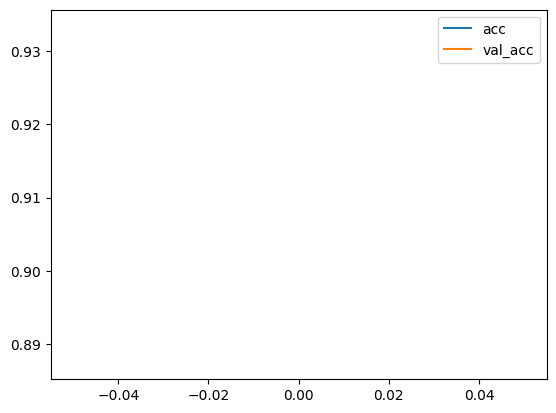

In [32]:
# Plot accuracy per iteration
plt.plot(r.history['acc'], label = 'acc')
plt.plot(r.history['val_acc'], label = 'val_acc')
plt.legend()

In [33]:
r.history['acc']

[0.9333333373069763]